In [131]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import json
import seaborn as sns
import os
import time
import random
import pickle
import numba
from tqdm import tqdm

t_p = 'd://새 폴더/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터.zip'
v_p = 'd://새 폴더/비대면 진료를 위한 의료진 및 환자 음성/Validation/[V]라벨링데이터.zip'

In [2]:
# json 파일 경로 모음
t_json = []
v_json = []

with zipfile.ZipFile(t_p, 'r') as zipObj:
    listOfFileNames = zipObj.namelist()
    for fileName in listOfFileNames:
        if fileName.endswith('.json') == True:
            t_json.append(fileName)

with zipfile.ZipFile(v_p, 'r') as zipObj:
    listOfFileNames = zipObj.namelist()
    for fileName in listOfFileNames:
        if fileName.endswith('.json') == True:
            v_json.append(fileName)

In [3]:
print(t_json[100])

medsub/환자/PE_0073/PE_0073-16490-01-03-F-09-A.json


In [40]:
# 원하는 특정파일만 추출
with zipfile.ZipFile(t_p, 'r') as zipObj:
    listOfFileNames = zipObj.namelist()
    for fileName in listOfFileNames:
        if fileName.endswith("json"):
            zipObj.extract(fileName, 't_json')


with zipfile.ZipFile(v_p, 'r') as zipObj:
    listOfFileNames = zipObj.namelist()
    for fileName in listOfFileNames:
        if fileName.endswith("json"):
            zipObj.extract(fileName, 'v_json')

In [4]:
print(t_json[0])
print(v_json[0])

medsub/환자/PE_0073/PE_0073-16716-01-03-F-09-A.json
medv/간호사/HA_0355/HA_0355-1833-01-02-F-05-A.json


In [5]:
# 특정파일 추춯에 접근하기 위한 경로 재설정
for k,i in enumerate(t_json):
    t_json[k] = 't_json/' + i
for k,i in enumerate(v_json):
    v_json[k] = 'v_json/' + i

In [6]:
t_json[30]

't_json/medsub/환자/PE_0073/PE_0073-16746-01-03-F-09-A.json'

In [7]:
with open (t_json[0], "r") as f:
    json_data_load = json.load(f)
json_data_load.keys()

dict_keys(['기본정보', '음성정보', '전사정보', '화자정보', '환경정보', '파일정보', '기타정보'])

In [8]:
def test_generator():
    a = [1,2,3]
    yield from a
gen = test_generator()
gen

<generator object test_generator at 0x000001827E054120>

In [1]:
# multiprocessing time
import multiprocessing
import time
star_time = time.time()

def count(name):
    for i in range(1,50001):
        print(i)

num_list = ['p1','p2','p3','p4']

if __name__ == '__main__':
    pool = multiprocessing.Pool(4)
    pool.map(count,num_list)
    pool.close()
    pool.join()

print(time.time - star_time)

In [2]:
import multiprocessing
print(multiprocessing.cpu_count())

8


In [ ]:
from multiprocessing import Process
import time
import os
start_time = time.time()
pre_d = []
arr = []
num = 0
def do(cnt):
    for i in t_json_random:
        with open (i, "r",encoding='utf-8') as f:
            json_data_load = json.load(f)
            for _,v in json_data_load.items():
                [pre_d.append(i) for i in v.values()]
            return pre_d
    

if __name__ == '__main__':
    t_json_random = random.sample(t_json,100)
    procs = []

    for index, number in enumerate(t_json_random):
        proc = Process(target=do, args=(number,))
        print(proc)
        arr.append(pre_d)
        pre_d = []
        procs.append(proc)
        proc.start()
    for proc in procs:
        proc.join()

print(time.time() - start_time)

In [128]:
# array sample
pre_d = []
arr = np.empty((1,34)).astype(int)

t_json_random = random.sample(t_json,100)
for i in t_json_random:
    with open (i, "r",encoding='utf-8') as f:
        json_data_load = json.load(f)
        for _,v in json_data_load.items():
            [pre_d.append(i) for i in v.values()]
    pre_d = np.array(pre_d).reshape(1,34)
    arr = np.concatenate((arr,pre_d),0)
    pre_d = []
arr = np.delete(arr,0,axis=0)

In [112]:
# array time
pre_d = []
arr = np.empty((1,34)).astype(int)
arr_time = []

# 10회 동안 평균과 표준편차를 구하기 위한 for문
for _ in range(10):    
    t_json_random = random.sample(t_json,100)

    # 데이터를 한 파일씩 읽어 concat하는 for문
    start = time.time()
    for i in t_json_random:
        with open (i, "r",encoding='utf-8') as f:
            json_data_load = json.load(f)
            for _,v in json_data_load.items():
                [pre_d.append(i) for i in v.values()]
        pre_d = np.array(pre_d).reshape(1,34)
        arr = np.concatenate((arr,pre_d),0)
        pre_d = []
        
    # 초기 index 0에 위치한 배열을 없애주기 위한 구문
    arr = np.delete(arr,0,axis=0)
    end = time.time()
    arr = np.empty((1,34)).astype(int)
    arr_time.append(end - start)
print(end - start)

0.46704554557800293


In [120]:
arr

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [113]:
arr_time

[0.6473007202148438,
 0.5123403072357178,
 0.47626638412475586,
 0.48538875579833984,
 0.46213579177856445,
 0.48224782943725586,
 0.49198389053344727,
 0.48000359535217285,
 0.49327659606933594,
 0.46704554557800293]

In [132]:
# list time
pre_lis = []
lis = []
lis_time = []

# 10회 동안 평균과 표준편차를 구하기 위한 for문
for _ in range(10):
    t_json_random = random.sample(t_json,100)

    # 데이터를 한 파일씩 읽어 concat하는 for문
    start = time.time()
    for i in t_json_random:
        with open (i, "r",encoding='utf-8') as f:
            json_data_load = json.load(f)
            for _,v in json_data_load.items():
                [pre_lis.append(i) for i in v.values()]
            lis.append(pre_lis)
            pre_lis = []
    end = time.time()
    lis = []
    lis_time.append(end - start)
print(end - start)

0.47826385498046875


In [136]:
# datframe list
np.mean(lis_time)

0.4910315752029419

In [116]:
# pandas time
person = pd.DataFrame()
df = pd.DataFrame()
df_time = []
num = 0

# 10회 동안 평균과 표준편차를 구하기 위한 for문
for _ in range(10):
    t_json_random = random.sample(t_json,100)

    # 데이터를 한 파일씩 읽어 concat하는 for문
    start = time.time()
    for i in t_json_random:
        with open (i, "r",encoding='utf-8') as f:
            json_data_load = json.load(f)
            for k,j in enumerate(json_data_load.keys()):
                a = pd.DataFrame.from_dict(json_data_load.get(j),orient='index')
                if k < 6:
                    person = pd.concat([person,a])
                else:
                    person = pd.concat([person,a])
                    person.columns = [num]
                    df = pd.concat([df,person],axis =1)
                    person = pd.DataFrame()
                    num += 1

    end = time.time()
    df = pd.DataFrame()
    df_time.append(end - start)
print(end - start)

0.7829148769378662


In [119]:
df

""


In [117]:
df_time

[0.9654872417449951,
 0.8253452777862549,
 0.7959320545196533,
 0.7918591499328613,
 0.775662899017334,
 0.8502042293548584,
 0.7885706424713135,
 0.7847607135772705,
 0.8073487281799316,
 0.7829148769378662]

In [125]:
arr_time_mean = np.mean(arr_time)
arr_time_std = np.std(arr_time)
lis_time_mean = np.mean(lis_time)
lis_time_std = np.std(lis_time)
df_time_mean = np.mean(df_time)
df_time_std = np.std(df_time)
print(f'arr_mean : {arr_time_mean: .4f}\narr_std : {arr_time_std: .4f}')
print(f'lis_mean : {lis_time_mean: .4f}\nlis_std : {lis_time_std: .4f}')
print(f'df_mean : {df_time_mean: .4f}\ndf_std : {df_time_std: .4f}')

arr_mean :  0.4998
arr_std :  0.0510
lis_mean :  0.4696
lis_std :  0.0192
df_mean :  0.8168
df_std :  0.0540


In [27]:
np.concatenate((a,b),axis=0).astype(int)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [234]:
# generator and multiprocessing
def process(num_lis):
    pre_d = []
    arr = []
    for i in num_lis:
        with open (i, "r",encoding='utf-8') as f:
            json_data_load = json.load(f)
            for _,v in json_data_load.items():
                [pre_d.append(i) for i in v.values()]
            arr.append(pre_d)
            pre_d = []
    return arr
    

def gen():
    t_json_random = random.sample(t_json,100)
    for _ in range(1,5):
        yield t_json_random[:25]
        del t_json_random[:25]


def main():
    t_json_random = random.sample(t_json,100)
    num_arr = gen()
    #print(list(num_arr)[0])
    procs = []
    for index, t in enumerate(t_json_random):
        proc = Process(target=process, args=(list(num_arr)))
        procs.append(proc)
        proc.start()


if __name__ == '__main__':
    start_time = time.time()
    main()
    end_time = time.time()
print(end_time - start_time)

1.467540979385376


In [ ]:
def gen():
    t_json_random = random.sample(t_json,100)
    for _ in range(1,5):
        yield t_json_random[:25]
        del t_json_random[:25]


In [ ]:
b = []
a = np.empty((1,34)).astype(int)
with open (t_json[0], "r") as f:
    json_data_load = json.load(f)
    for _,v in json_data_load.items():
        for j in v.values():
            print(j)


In [260]:
# list time
from tqdm import tqdm
pre_d = []
lis = []
num = 0
start = time.time()
for i in tqdm(t_json):
    with open (i, "r",encoding='utf-8') as f:
        json_data_load = json.load(f)
        for _,v in json_data_load.items():
            [pre_d.append(i) for i in v.values()]
        lis.append(pre_d)
        pre_d = []
end = time.time()
print(end - start)

100%|██████████| 1130811/1130811 [1:31:36<00:00, 205.72it/s]

5496.912704467773


In [264]:
with open('arr.pickle', 'wb') as f:
    pickle.dump(arr, f, pickle.HIGHEST_PROTOCOL)

In [34]:
t_json[0]

't_json/medsub/환자/PE_0073/PE_0073-16716-01-03-F-09-A.json'

In [35]:
# list time
pre_d = []
lis = []
num = 0
keys = []
t_json_random = random.sample(t_json,1)
start = time.time()
for i in t_json_random:
    with open (i, "r",encoding='utf-8') as f:
        json_data_load = json.load(f)
        for _,v in json_data_load.items():
            [pre_d.append(i) for i in v.values()]
            [keys.append(i)for i in v.keys()]
        lis.append(pre_d)
        pre_d = []
end = time.time()
print(end - start)

0.010998249053955078


In [36]:
keys

['Language',
 'Version',
 'ApplicationCategory',
 'NumberOfSpeaker',
 'NumberOfUtterance',
 'DataCategory',
 'RecordingDate',
 'FillingDate',
 'RevisionHistory',
 'Distributor',
 'SamplingRate',
 'ByteOrder',
 'EncodingLaw',
 'NumberOfBit',
 'NumberOfChannel',
 'SignalToNoiseRatio',
 'LabelText',
 'Gender',
 'Age',
 'Region',
 'Dialect',
 'RecordingEnviron',
 'NoiseEnviron',
 'RecordingDevice',
 'FileCategory',
 'FileName',
 'DirectoryPath',
 'HeaderSize',
 'FileLength',
 'FileFormat',
 'NumberOfRepeat',
 'TimeInterval',
 'Distance',
 'QualityStatus']

In [9]:
# 불러온 데이터를 pickle로 저장 후 불러와서 사용
with open('arr.pickle', 'rb') as f:
	data = pickle.load(f)

# 총 데이터 개수
len(data)

1130811

In [10]:
# 기본정보, 음성정보 등 모두 들어가 있는지 확인
len(data[0])

34

In [11]:
# speakname 속성이 있는 것을 발견
# 총 795개
# haveon0o,notprovided, pb_0207의 고유값을 가지고 있는 것을 확인
lis_35 = [] 
for i in data:
    if len(i) == 35:
        lis_35.append(i)

lis_35_df = pd.DataFrame(data=lis_35)
print(len(lis_35))
lis_35_df[17].unique()

795


array(['HAHEON0O', 'PB_0207', 'NotProvided'], dtype=object)

In [12]:
# 총 데이터 1130811 중 795개 0.1%도 되지 않아 제거하고 탐색을 진행
copy_data = data.copy()
for i in data:
    if i in lis_35:
        copy_data.remove(i)
print(len(copy_data))

1130016


In [13]:
cols = ['Language', 'Version', 'ApplicationCategory', 'NumberOfSpeaker', 'NumberOfUtterance',
        'DataCategory', 'RecordingDate', 'FillingDate', 'RevisionHistory', 'Distributor',
        'SamplingRate', 'ByteOrder', 'EncodingLaw', 'NumberOfBit', 'NumberOfChannel',
        'SignalToNoiseRatio', 'LabelText','Gender', 'Age', 'Region', 'Dialect', 'RecordingEnviron',
        'NoiseEnviron', 'RecordingDevice', 'FileCategory', 'FileName', 'DirectoryPath', 'HeaderSize',
        'FileLength', 'FileFormat', 'NumberOfRepeat', 'TimeInterval','Distance','QualityStatus']

In [14]:
df = pd.DataFrame(data= copy_data,columns=cols)
df.head()

,Language,Version,ApplicationCategory,NumberOfSpeaker,NumberOfUtterance,DataCategory,RecordingDate,FillingDate,RevisionHistory,Distributor,...,FileCategory,FileName,DirectoryPath,HeaderSize,FileLength,FileFormat,NumberOfRepeat,TimeInterval,Distance,QualityStatus
0,KOR,N/A,N/A,N/A,N/A,mariaDB,2021-01-15 12:50:48,N/A,N/A,Mediazen,...,Audio,PE_0073-16716-01-03-F-09-A.wav,/nia/metrixB/data/PE_0073,44,5.22,PCM,1,0,30,Good
1,KOR,N/A,N/A,N/A,N/A,mariaDB,2021-01-15 11:51:56,N/A,N/A,Mediazen,...,Audio,PE_0073-16558-01-03-F-09-A.wav,/nia/metrixB/data/PE_0073,44,3.84,PCM,1,0,30,Good
2,KOR,N/A,N/A,N/A,N/A,mariaDB,2021-01-15 12:35:44,N/A,N/A,Mediazen,...,Audio,PE_0073-16697-01-03-F-09-A.wav,/nia/metrixB/data/PE_0073,44,5.04,PCM,1,0,30,Good
3,KOR,N/A,N/A,N/A,N/A,mariaDB,2021-01-15 11:30:45,N/A,N/A,Mediazen,...,Audio,PE_0073-16496-01-03-F-09-A.wav,/nia/metrixB/data/PE_0073,44,5.70,PCM,1,0,30,Good
4,KOR,N/A,N/A,N/A,N/A,mariaDB,2021-01-15 11:51:04,N/A,N/A,Mediazen,...,Audio,PE_0073-16555-01-03-F-09-A.wav,/nia/metrixB/data/PE_0073,44,10.08,PCM,1,0,30,Good


In [15]:
voice_df = df[['SamplingRate', 'SignalToNoiseRatio', 'NumberOfBit', 'NumberOfChannel','QualityStatus']]
voice_df

,SamplingRate,SignalToNoiseRatio,NumberOfBit,NumberOfChannel,QualityStatus
0,48000,N/A,16,1,Good
1,48000,N/A,16,1,Good
2,48000,N/A,16,1,Good
3,48000,N/A,16,1,Good
4,48000,N/A,16,1,Good
...,...,...,...,...,...
1130011,48000,N/A,16,1,Good
1130012,48000,N/A,16,1,Good
1130013,48000,N/A,16,1,Good
1130014,48000,N/A,16,1,Good


In [16]:
# 각 column의 고유값 확인
sample = voice_df['SamplingRate'].unique()
snr = voice_df['SignalToNoiseRatio'].unique()
bit = voice_df['NumberOfBit'].unique()
channel = voice_df['NumberOfChannel'].unique()
quality = voice_df['QualityStatus'].unique()
print(f'{sample}\n{snr}\n{bit}\n{channel}\n{quality}')

['48000']
['N/A']
['16']
['1']
['Good']


In [17]:
# 전체 데이터 결측치 확인
# N/A > 이곳에 값이 있어야하는데 값을 못늫은상태 출력이 됨, python에서는 nan,none를 결측치로 인식
# null > 아무것도없음, 출력안댐
df.isnull().sum()

Language               0
Version                0
ApplicationCategory    0
NumberOfSpeaker        0
NumberOfUtterance      0
DataCategory           0
RecordingDate          0
FillingDate            0
RevisionHistory        0
Distributor            0
SamplingRate           0
ByteOrder              0
EncodingLaw            0
NumberOfBit            0
NumberOfChannel        0
SignalToNoiseRatio     0
LabelText              0
Gender                 0
Age                    0
Region                 0
Dialect                0
RecordingEnviron       0
NoiseEnviron           0
RecordingDevice        0
FileCategory           0
FileName               0
DirectoryPath          0
HeaderSize             0
FileLength             0
FileFormat             0
NumberOfRepeat         0
TimeInterval           0
Distance               0
QualityStatus          0
dtype: int64

In [106]:
categori_df = df[['Version','Gender','Age','Region','Dialect','LabelText']]
categori_df.head()

,Version,Gender,Age,Region,Dialect,LabelText
0,N/A,Female,over70,서울/인천/경기,경기/서울,매일 저녁 먹을 때 와인 한 잔씩 마셔요.
1,N/A,Female,over70,서울/인천/경기,경기/서울,안 하려고 노력하는데요.
2,N/A,Female,over70,서울/인천/경기,경기/서울,전자 담배로 바꾼 기간도 포함되나요?
3,N/A,Female,over70,서울/인천/경기,경기/서울,아예 잠이 안 오는 게 제일 큰 문제에요.
4,N/A,Female,over70,서울/인천/경기,경기/서울,되게 잘 자요. 베개에 머리를 대자마자 자거든요. 일곱 시간은 기본적으로 자요.


In [107]:
# 각 column의 고유값 확인
ver = categori_df['Version'].unique()
gen = categori_df['Gender'].unique()
age = categori_df['Age'].unique()
region = categori_df['Region'].unique()
dialect = categori_df['Dialect'].unique()
label = categori_df['LabelText'].unique()
print(f'{ver}\n{gen}\n{age}\n{region}\n{dialect}')
print(len(label))

['N/A']
['Female' 'Male']
['over70' '20~29' '50~59' '30~39' '40~49' '11~19' '60~69' '7~10' '3~6']
['서울/인천/경기' '부산/대구/울산/경상' '대전/세종/충청/강원' '광주/전라/제주']
['경기/서울' '경상' '충청' '전라' '강원' '제주' '기타(외국)']
39724


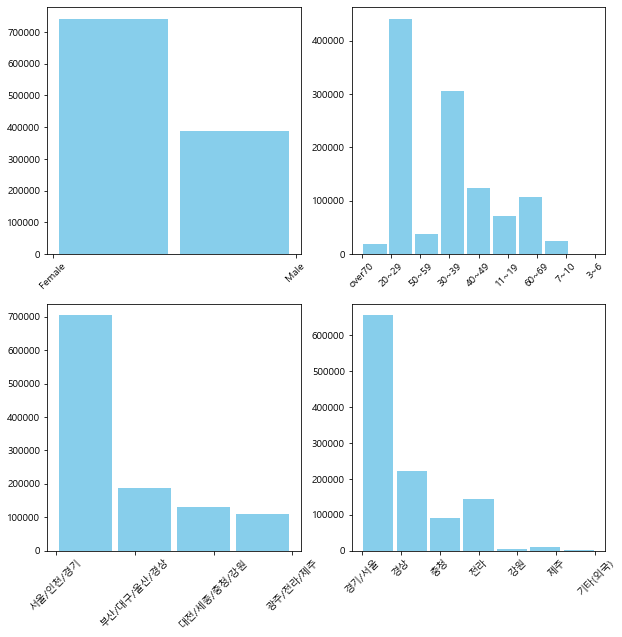

In [20]:
# histogram - gender, age, region, dialect
# 각 고유값 빈도수 확인
def hist_feature(df,features, rows, cols, size=(10,10)):
      plt.rcParams['font.family'] = 'Malgun Gothic'
      mpl.rc('font',size=9)
      plt.figure(figsize=(10,10))
      grid = gridspec.GridSpec(rows,cols)
      plt.subplots_adjust(wspace=0.2, hspace=0.2)
      
      for idx, feature in enumerate(features):
            plt.subplot(grid[idx])
            plt.hist(feature, data=df,color = "skyblue", bins = len(df[feature].unique()),rwidth=0.9)
            plt.xticks(rotation=45)
hist_feature(categori_df, ['Gender','Age','Region','Dialect'], 2, 2)

In [21]:
df.loc[[0]]

,Language,Version,ApplicationCategory,NumberOfSpeaker,NumberOfUtterance,DataCategory,RecordingDate,FillingDate,RevisionHistory,Distributor,...,FileCategory,FileName,DirectoryPath,HeaderSize,FileLength,FileFormat,NumberOfRepeat,TimeInterval,Distance,QualityStatus
0,KOR,N/A,N/A,N/A,N/A,mariaDB,2021-01-15 12:50:48,N/A,N/A,Mediazen,...,Audio,PE_0073-16716-01-03-F-09-A.wav,/nia/metrixB/data/PE_0073,44,5.22,PCM,1,0,30,Good


In [48]:
# bar plot - gender, age, region, dialect
def bar_feature(df,features, rows, cols, size=(15,25)):
  plt.rcParams['font.family'] = 'Malgun Gothic'    
  mpl.rc('font',size=9)
  plt.figure(figsize=(15,15))
  grid = gridspec.GridSpec(rows,cols)
  plt.subplots_adjust(wspace=0.3, hspace=1)

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    sns.barplot(x=feature, y='LabelText', data = df, palette='Set2',ax=ax)

In [91]:
# 각 labeltext 빈도수 확인
label_text = [i for i in categori_df.groupby('LabelText').size() if i >= 20]
# label_text = []
# m = []
# for k,i in enumerate(categori_df.groupby('LabelText').size()):
#     if i >= 20:
#         m.append(categori_df.groupby('LabelText').size()[i].index)   
#         label_text.append(i)
# categori_df.groupby('LabelText').size().sort_values

categori_df.groupby('LabelText').size().index

Index(['가게 하나 운영하고 있어요.', '가게를 운영해요.', '가격이 비싸지 않나요?'], dtype='object', name='LabelText')

In [ ]:
s

In [132]:
label_series = categori_df.groupby('LabelText').size()
for k,i in zip(label_series.index,label_series.values):
    if i < 20:
        label_series = label_series.drop(k)
# a = [s.drop(k) for k,i in zip(s.index,s.values) if i <= 20]
label_series

LabelText
가게를 운영해요.                          23
가격이 비싸지 않나요?                       20
가고 싶긴 한데 움직이는 게 불편해요.              20
가고 싶어도 못 가서 일 년은 외국 땅 밟지도 못했어요.    31
가고 싶었는데 취소했어요.                     22
                                   ..
힘이 빠지나요?                           86
힘이 빠지는 느낌을 받나요?                    82
힘이 없고 늘 피로한가요?                     81
힘이 없고 입도 계속 말라요.                   23
힘찬 비뇨기과요.                          22
Length: 23357, dtype: int64

In [110]:
len(s)

23357

In [103]:
(categori_df.groupby('LabelText').size() >= 20).sum()

23357

In [ ]:
list(s.index)

In [124]:
s.index

Index(['가게를 운영해요.', '가격이 비싸지 않나요?', '가고 싶긴 한데 움직이는 게 불편해요.',
       '가고 싶어도 못 가서 일 년은 외국 땅 밟지도 못했어요.', '가고 싶었는데 취소했어요.',
       '가고 싶은데 거동이 불편해서요.', '가고 싶은지 어떻게 아셨어요?', '가고는 싶은데 막상 가면 안 나올 것 같아요.',
       '가고는 싶은데 통증이 있을까 봐 무서워서 잘 안 가요.', '가급적 브래지어도 벗고 가운을 착용하시기 바랍니다.',
       ...
       '힘을 줘도 대변이 잘 안 나오시나요?', '힘을 줘서 근육통이 생길 수 있습니다.',
       '힘이 나질 않고 무기력함만 느끼시나요?', '힘이 듭니다.', '힘이 많이 달린다는 느낌은 없으시고요?', '힘이 빠지나요?',
       '힘이 빠지는 느낌을 받나요?', '힘이 없고 늘 피로한가요?', '힘이 없고 입도 계속 말라요.', '힘찬 비뇨기과요.'],
      dtype='object', name='LabelText', length=23357)

<BarContainer object of 23357 artists>

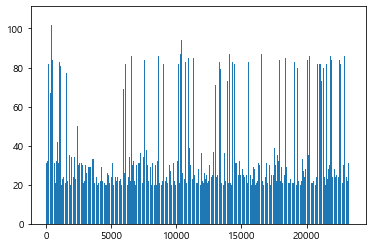

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

plt.bar(le.fit_transform(list(s.index)), list(s.values))
plt.xlabel('labeltext')
plt.ylabel('count')
# 분류한거 다시 문자열로 복구
# le.inverse_transform(a)

In [129]:
(categori_df.groupby('LabelText').size() == 1).sum()

863

In [130]:
(categori_df.groupby('LabelText').size() < 10).sum()

2098

In [128]:
len(categori_df.groupby('LabelText').size())

39724

In [152]:
rem = []
new_le_lis = []
new_iden_lis = []

for k, i in tqdm(enumerate(categori_df.groupby('LabelText').size())):
    if i >= 20:
        new_le_lis.append(le_lis[i])
        new_iden_lis.append(iden_lis[i])
new_le_lis[0]

  0%|          | 2608/1130016 [01:18<9:23:37, 33.34it/s] 


KeyboardInterrupt: 

In [21]:
# label_text 평균 횟수
print(f'label 평균횟수 : {np.mean(label_text)}\nlabel 최소횟수 : {np.min(label_text)}\nlabel 최대횟수 : {max(label_text)}')

label 평균횟수 : 28.446682106535093
label 최소횟수 : 1
label 최대횟수 : 106


In [134]:
# 원하는 특정파일만 추출
with zipfile.ZipFile(t_p, 'r') as zipObj:
    ls = zipObj.namelist()
print(ls)

KeyboardInterrupt: 

In [66]:
wav_lis = []
for i in range(20):
    wav_lis.append(a[i])
    wav_lis.append(b[i])
    wav_lis.append(c[i])

KeyError: 0

In [156]:
# array > np.append
# np.concatenate
# a = np.ones(3,int)
b = np.full(3,2)
# c = np.full(3,2)


# 빈 배열에 1차원 concat 하는 예시인데 직선으로만 추가 가능해서 axis=0만 존재
a = np.array([])
np.concatenate([a,b])


# arr = np.empty((0,3),int)
# arr = np.append(arr,np.array([[1,2,3]]),axis=0)
# arr = np.append(arr,np.array([[4,5,0]]),axis=0)
# arr

array([2., 2., 2.])

In [255]:
# pandas time
person = pd.DataFrame()
all = pd.DataFrame()
num = 0
t_json_random = random.sample(t_json,100)
start = time.time()
for i in tqdm(t_json_random):
    with open (i, "r",encoding='utf-8') as f:
        json_data_load = json.load(f)
        for k,j in enumerate(json_data_load.keys()):
            a = pd.DataFrame.from_dict(json_data_load.get(j),orient='index')
            if k < 6:
                person = pd.concat([person,a])
            else:
                person = pd.concat([person,a])
                person.columns = [num]
                all = pd.concat([all,person],axis =1)
                person = pd.DataFrame()
                num += 1

end = time.time()
print(end - start)

100%|██████████| 100/100 [00:00<00:00, 108.98it/s]

0.9225649833679199


In [24]:
all[:2]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Language,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,...,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR
Version,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [41]:
all.to_numpy()

array([['KOR', 'KOR', 'KOR', ..., 'KOR', 'KOR', 'KOR'],
       ['N/A', 'N/A', 'N/A', ..., 'N/A', 'N/A', 'N/A'],
       ['N/A', 'N/A', 'N/A', ..., 'N/A', 'N/A', 'N/A'],
       ...,
       ['0', '0', '0', ..., '0', '0', '0'],
       ['30', '30', '30', ..., '30', '30', '30'],
       ['Good', 'Good', 'Good', ..., 'Good', 'Good', 'Good']],
      dtype=object)

In [11]:
all_t = all.transpose()

In [12]:
all_t.head()

,Language,Version,ApplicationCategory,NumberOfSpeaker,NumberOfUtterance,DataCategory,RecordingDate,FillingDate,RevisionHistory,Distributor,...,FileCategory,FileName,DirectoryPath,HeaderSize,FileLength,FileFormat,NumberOfRepeat,TimeInterval,Distance,QualityStatus
0,KOR,N/A,N/A,N/A,N/A,mariaDB,2021-02-04 02:56:50,N/A,N/A,Mediazen,...,Audio,HB_0430-2302-01-01-M-04-A.wav,/nia/HB/data/HB_0430,44,3.00,PCM,1,0,30,Good
1,KOR,N/A,N/A,N/A,N/A,mariaDB,2021-02-14 12:04:35,N/A,N/A,Mediazen,...,Audio,HB_0107-381-01-01-M-04-B.wav,/nia/HB/data/HB_0107,44,2.28,PCM,1,0,30,Good
2,KOR,N/A,N/A,N/A,N/A,mariaDB,2020-12-28 15:20:51,N/A,N/A,Mediazen,...,Audio,PA_0089-1047-01-03-F-05-B.wav,/nia/metrixB/data/PA_0089,44,2.10,PCM,1,0,30,Good
3,KOR,N/A,N/A,N/A,N/A,mariaDB,2021-01-24 12:02:24,N/A,N/A,Mediazen,...,Audio,HA_0880-4391-01-02-F-06-A.wav,/nia/HA/data/HA_0880,44,2.82,PCM,1,0,30,Good
4,KOR,N/A,N/A,N/A,N/A,mariaDB,2021-01-06 12:37:05,N/A,N/A,Mediazen,...,Audio,PE_0169-17896-01-03-F-09-A.wav,/nia/metrixB/data/PE_0169,44,7.02,PCM,1,0,30,Good


In [13]:
dd_df = all_t[['SamplingRate', 'SignalToNoiseRatio', 'NumberOfBit', 'NumberOfChannel']]
dd_df

,SamplingRate,SignalToNoiseRatio,NumberOfBit,NumberOfChannel
0,48000,N/A,16,1
1,48000,N/A,16,1
2,48000,N/A,16,1
3,48000,N/A,16,1
4,48000,N/A,16,1
...,...,...,...,...
995,48000,N/A,16,1
996,48000,N/A,16,1
997,48000,N/A,16,1
998,48000,N/A,16,1


In [14]:
# 각 column의 고유값 확인
sample = dd_df['SamplingRate'].unique()
snr = dd_df['SignalToNoiseRatio'].unique()
bit = dd_df['NumberOfBit'].unique()
channel = dd_df['NumberOfChannel'].unique()
print(f'{sample}\n{snr}\n{bit}\n{channel}')

['48000']
['N/A']
['16']
['1']


In [15]:
# 전체 데이터 결측치 확인
all_t.isnull().sum()

Language               0
Version                0
ApplicationCategory    0
NumberOfSpeaker        0
NumberOfUtterance      0
DataCategory           0
RecordingDate          0
FillingDate            0
RevisionHistory        0
Distributor            0
SamplingRate           0
ByteOrder              0
EncodingLaw            0
NumberOfBit            0
NumberOfChannel        0
SignalToNoiseRatio     0
LabelText              0
Gender                 0
Age                    0
Region                 0
Dialect                0
RecordingEnviron       0
NoiseEnviron           0
RecordingDevice        0
FileCategory           0
FileName               0
DirectoryPath          0
HeaderSize             0
FileLength             0
FileFormat             0
NumberOfRepeat         0
TimeInterval           0
Distance               0
QualityStatus          0
dtype: int64

In [16]:
# N/A > 이곳에 값이 있어야하는데 값을 못늫은상태 출력이 됨, python에서는 nan,none를 결측치로 인식
# null > 아무것도없음, 출력안댐
all_t_col = all_t.columns
all_t_col

Index(['Language', 'Version', 'ApplicationCategory', 'NumberOfSpeaker',
       'NumberOfUtterance', 'DataCategory', 'RecordingDate', 'FillingDate',
       'RevisionHistory', 'Distributor', 'SamplingRate', 'ByteOrder',
       'EncodingLaw', 'NumberOfBit', 'NumberOfChannel', 'SignalToNoiseRatio',
       'LabelText', 'Gender', 'Age', 'Region', 'Dialect', 'RecordingEnviron',
       'NoiseEnviron', 'RecordingDevice', 'FileCategory', 'FileName',
       'DirectoryPath', 'HeaderSize', 'FileLength', 'FileFormat',
       'NumberOfRepeat', 'TimeInterval', 'Distance', 'QualityStatus'],
      dtype='object')

In [43]:
categori_df = all_t[['Version','Gender','Age','Region','Dialect','LabelText']]
categori_df.head()

NameError: name 'all_t' is not defined

In [44]:
# 각 column의 고유값 확인
ver = categori_df['Version'].unique()
gen = categori_df['Gender'].unique()
age = categori_df['Age'].unique()
region = categori_df['Region'].unique()
dialect = categori_df['Dialect'].unique()
label = categori_df['LabelText'].unique()
print(f'{ver}\n{gen}\n{age}\n{region}\n{dialect}')
print(len(label))

NameError: name 'categori_df' is not defined

In [45]:
# histogram - gender, age, region, dialect
def hist_df(df,features, rows, cols, size=(10,10)):
      plt.rcParams['font.family'] = 'Malgun Gothic'
      mpl.rc('font',size=9)
      plt.figure(figsize=(10,10))
      grid = gridspec.GridSpec(rows,cols)
      plt.subplots_adjust(wspace=0.2, hspace=0.2)
      
      for idx, feature in enumerate(features):
            plt.subplot(grid[idx])
            plt.hist(feature, data=df)
hist_df(categori_df, ['Gender','Age','Region','Dialect'], 2, 2)

NameError: name 'categori_df' is not defined

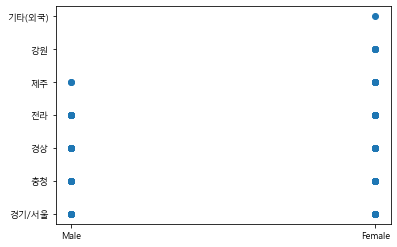

In [22]:
# bar plot - gender, age, region, dialect
def bar_feature(df,features, rows, cols, size=(15,25)):
  plt.rcParams['font.family'] = 'Malgun Gothic'    
  mpl.rc('font',size=9)
  plt.figure(figsize=(15,15))
  grid = gridspec.GridSpec(rows,cols)
  plt.subplots_adjust(wspace=0.3, hspace=1)

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    sns.barplot(x=feature, y='Survival period', data = df, palette='Set2',ax=ax)

bar_df = his

In [23]:
his_df.groupby('Age').get_group('20~29')[:5]

,Version,Gender,Age,Region,Dialect,LabelText
0,N/A,Male,20~29,서울/인천/경기,경기/서울,통증이 언제부터였는지 기억해요?
1,N/A,Male,20~29,대전/세종/충청/강원,충청,통증이 쭈욱 계속 이어지나요?
5,N/A,Male,20~29,부산/대구/울산/경상,경기/서울,여기 연락처는 새로 적을게요.
8,N/A,Female,20~29,서울/인천/경기,경기/서울,네 요즘 코로나 때문에 매일 보호자분도 열 체크해야 해서요.
9,N/A,Female,20~29,서울/인천/경기,경기/서울,정상적인 가래를 뱉으시나요?


In [2]:
import json
import pandas as pd
import numpy as np
import requests
import io
import re
import os
path_lis = [os.path.join(path,i) for i in job]
print(path_lis[0])

E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사


In [3]:
dir = [os.listdir(i) for i in path_lis]
print(len(dir),dir[1][1],len(dir[0]) + len(dir[1]) + len(dir[2]))

3 HB_0004 2425


In [4]:
# 패스합치기 1
dir_path = [[],[],[]]
for k,i in enumerate(dir):
    for v,j in enumerate(i):
        j = j.replace(j,path_lis[k]+'/'+j)
        dir_path[k].append(j)



In [5]:
print(len(dir_path[2]),len(dir[2]),dir_path[2][100])

1341 1341 E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/환자/PA_0171


In [6]:
data = [[],[],[]]
cnt = 0
for k,i in enumerate(dir_path):
    for v,j in enumerate(i):
        j = j.replace(j,j)
        data[k].append(j)

data[0][0]


'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010'

In [7]:
dir_path[0][0]

'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010'

In [8]:
data = [os.listdir(j) for k,i in enumerate(dir_path) for j in i]

In [9]:
data = [[],[],[]]
for k,i  in enumerate(dir_path):
    for v,j in enumerate(i):
        x = os.listdir(j)
        data[k].append(x)


In [10]:
print(data[0][0][:2])

['HA_0010-1-01-02-M-04-A.json', 'HA_0010-1-01-02-M-04-A.txt']


In [11]:
# path 합치기2
for k,i in enumerate(data):
    for v,j in enumerate(i):
        for t,e in enumerate(j):
            data[k][v][t] = data[k][v][t].replace(data[k][v][t],dir_path[k][v]+'/'+e)


In [12]:
data[0][0][:2]

['E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-1-01-02-M-04-A.json',
 'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-1-01-02-M-04-A.txt']

In [15]:
json_data = []
for i in data:
    for j in i:
        for e in j:
            if e.endswith('json') == True:
                json_data.append(e)

In [19]:
len(json_data)

1130811

In [65]:
json_data[:10]

['E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-1-01-02-M-04-A.json',
 'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-10-01-02-M-04-A.json',
 'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-100-01-02-M-04-A.json',
 'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-101-01-02-M-04-A.json',
 'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-102-01-02-M-04-A.json',
 'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-103-01-02-M-04-A.json',
 'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-104-01-02-M-04-A.json',
 'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-105-01-02-M-04-A.json',
 'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사/HA_0010/HA_0010-106-01-02-M-04-A.json',
 'E://비대면_data/비대면 진료를 위한 의료진 및

In [21]:
with open (json_data[0], "r") as f:
    asd = json.load(f)
asd.keys()

dict_keys(['기본정보', '음성정보', '전사정보', '화자정보', '환경정보', '파일정보', '기타정보'])

In [117]:
bin = pd.DataFrame()
person = pd.DataFrame()
all = pd.DataFrame()
cnt = 0
for i in json_data[:3]:
    with open (i, "r") as f:
        json_data_load = json.load(f)
        for j in json_data_load.keys():
            print(j)
            cnt += 1
            a = pd.DataFrame.from_dict(json_data_load.get(j),orient='index')
            if cnt < 7:
                person = pd.concat([person,a])
            else:
                all = pd.concat([all,person],axis =1)
                person = pd.DataFrame()
                person = pd.concat([bin,a])
                cnt = 0

In [115]:
all

,0,1,2
Language,KOR,KOR,KOR
Version,N/A,N/A,N/A
ApplicationCategory,N/A,N/A,N/A
NumberOfSpeaker,N/A,N/A,N/A
NumberOfUtterance,N/A,N/A,N/A
DataCategory,mariaDB,mariaDB,mariaDB
RecordingDate,2021-01-25 19:04:54,2021-01-25 19:07:52,2021-01-25 19:23:13
FillingDate,N/A,N/A,N/A
RevisionHistory,N/A,N/A,N/A
Distributor,Mediazen,Mediazen,Mediazen


In [113]:
with open (json_data[0], "r") as f:
    a = json.load(f)
aa = pd.DataFrame.from_dict(a.get('기본정보'),orient='index')
bb = pd.DataFrame.from_dict(a.get('음성정보'),orient='index')
cc = pd.DataFrame.from_dict(a.get('전사정보'),orient='index')
dd = pd.DataFrame.from_dict(a.get('화자정보'),orient='index')
ee = pd.DataFrame.from_dict(a.get('환경정보'),orient='index')
gg = pd.DataFrame.from_dict(a.get('파일정보'),orient='index')
ff = pd.DataFrame.from_dict(a.get('기타정보'),orient='index')

len(aa+bb+cc+dd+ee+ff+gg)
aa.columns = ['ddd']
aa

,ddd
Language,KOR
Version,N/A
ApplicationCategory,N/A
NumberOfSpeaker,N/A
NumberOfUtterance,N/A
DataCategory,mariaDB
RecordingDate,2021-01-25 19:04:54
FillingDate,N/A
RevisionHistory,N/A
Distributor,Mediazen


In [54]:
:s.path.splitext(path_lis[0])

'E://비대면_data/비대면 진료를 위한 의료진 및 환자 음성/Training/[T]라벨링데이터/medsub/간호사'

In [7]:
def json_to_dataframe(path, record_path = ['dataSearch','content'], verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file") 
    file = json.loads(url_get_text)
    if verbose:
        print("processing...")
    con_qa = pd.io.json.json_normalize(file , record_path)

    gubun = []
    for i in range(len(file['dataSearch']['content'])):
      gubun.append(file['dataSearch']['content'][i]['gubun'])
    
    url_get_ans = input_file_path[:109] + 'COUNSEL_VIEW&contentType=json&gubun='

    text = []
    bul = ['&nbsp;','\r\n']
    for i in range(len(gubun)):
      url_qa_join = url_get_ans + gubun[i]
      url_qa_join_request = requests.get(url_qa_join)
      url_qa_join_request_text = url_qa_join_request.text
      url_json = json.loads(url_qa_join_request_text)
      text_rem = re.sub('(<([^>]+)>)', '', str(url_json['dataSearch']['content'][0]['answer']))
      for j in range(len(bul)):
        text_rem = text_rem.replace(bul[j],'')
      text.append(text_rem)
    text_pd = pd.DataFrame(text, columns = ['answer'])

    all_data = pd.concat([con_qa,text_pd],axis = 1)

    return all_data

[[1], [2], [3]]
